Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


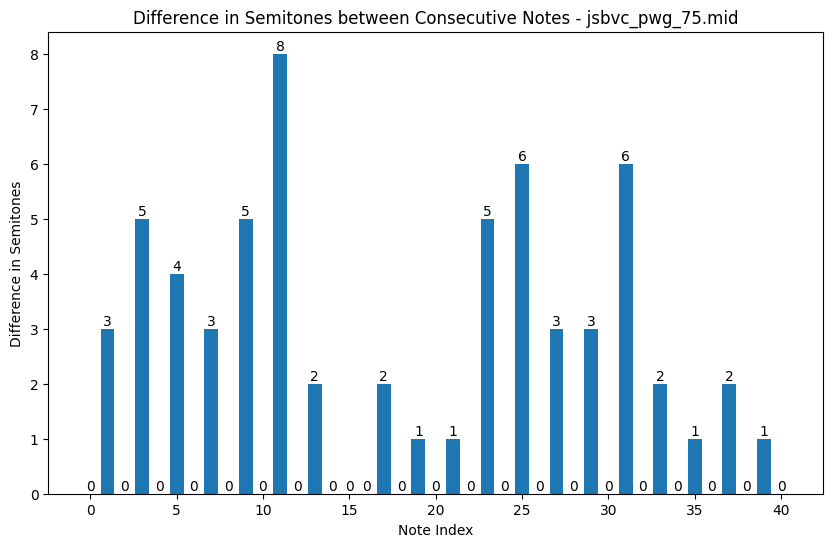

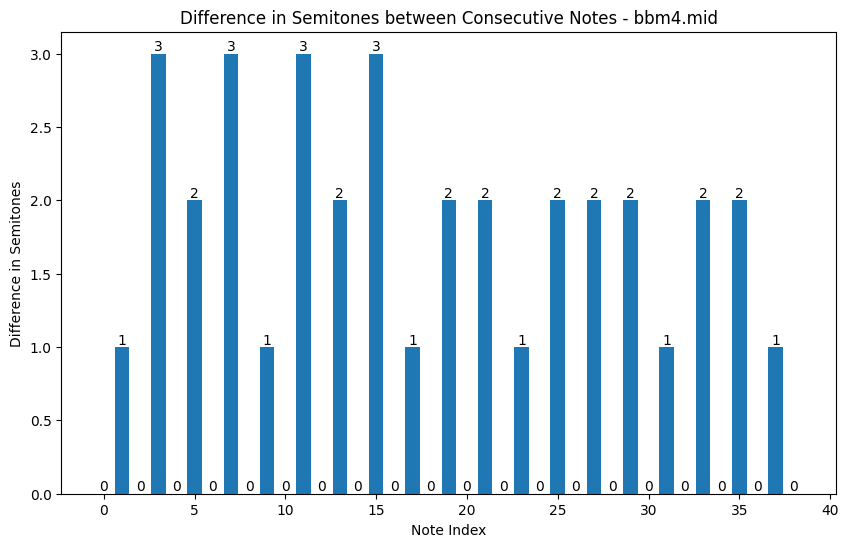

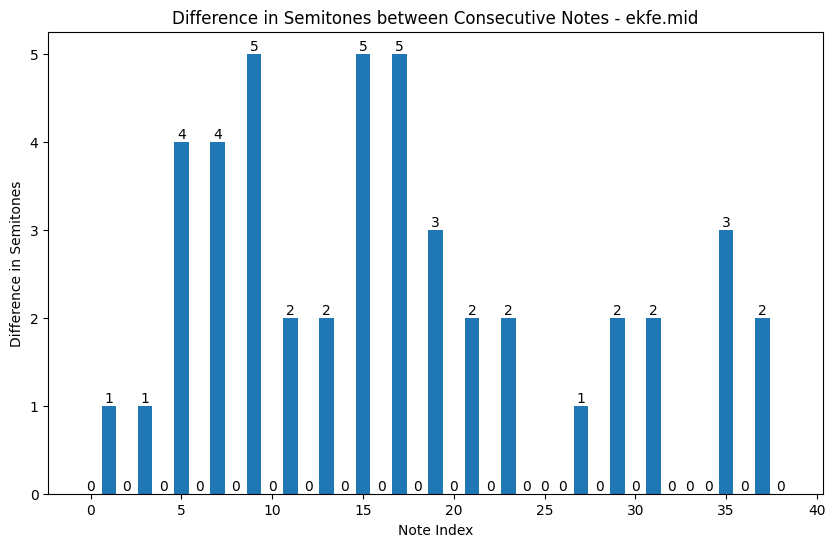

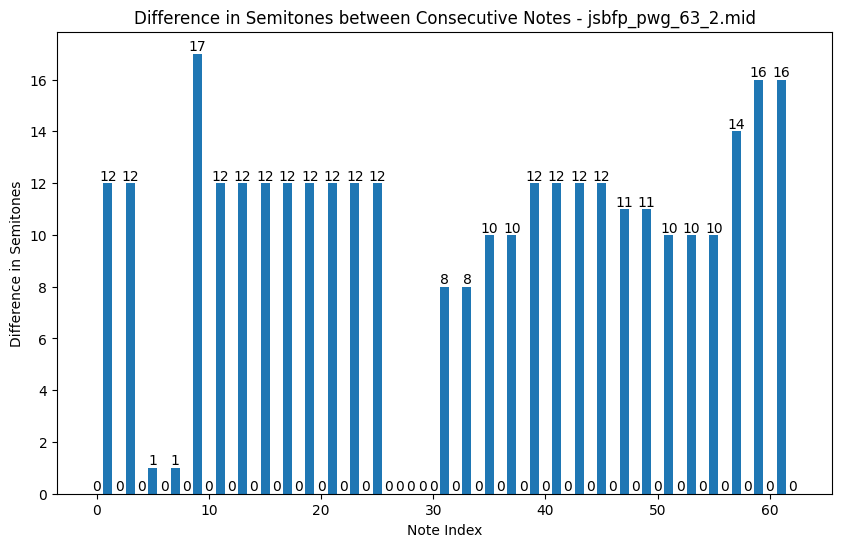

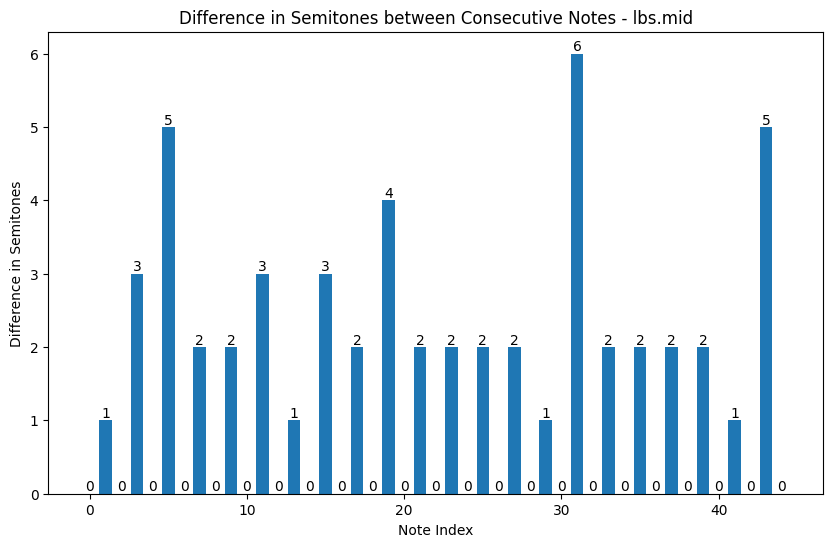

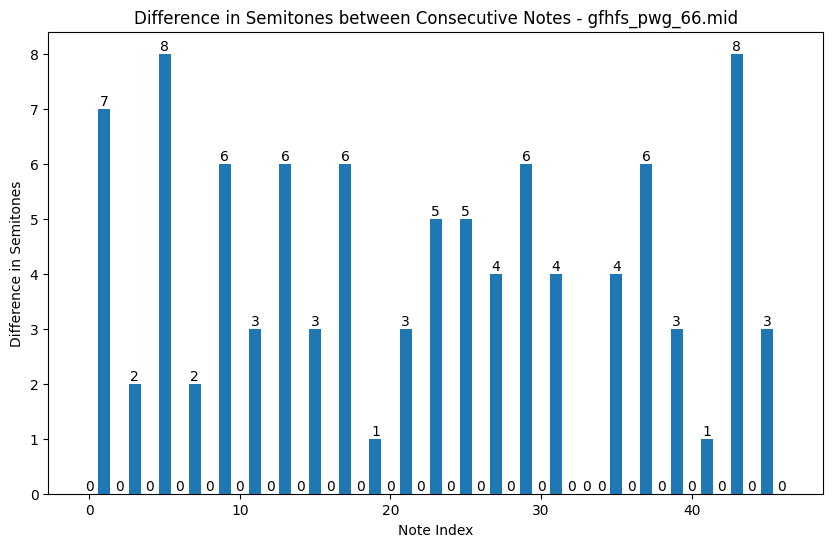

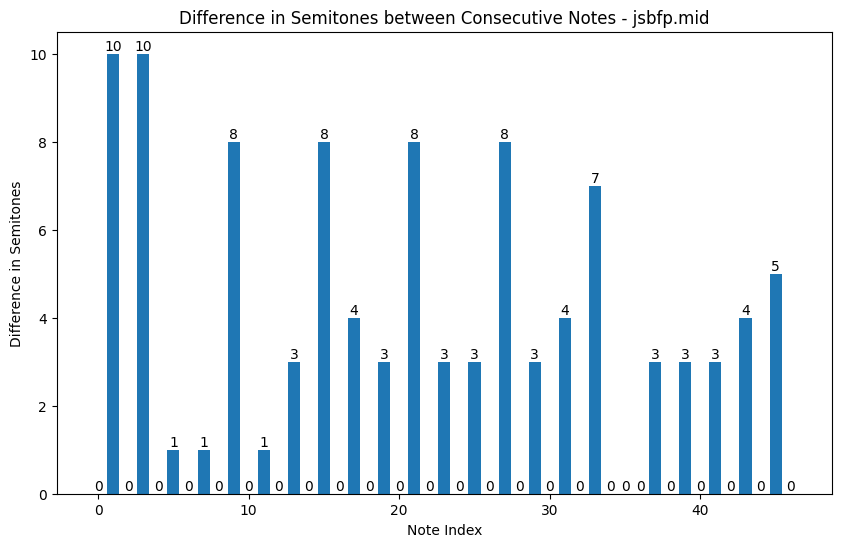

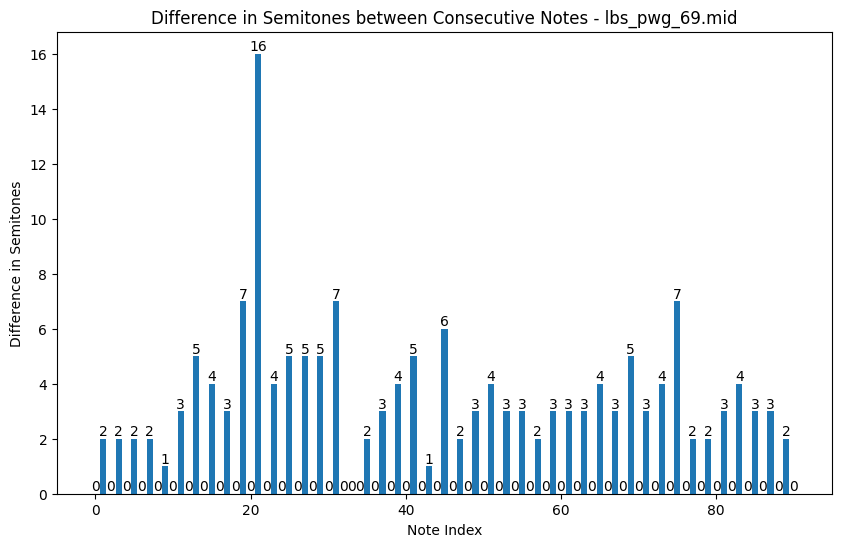

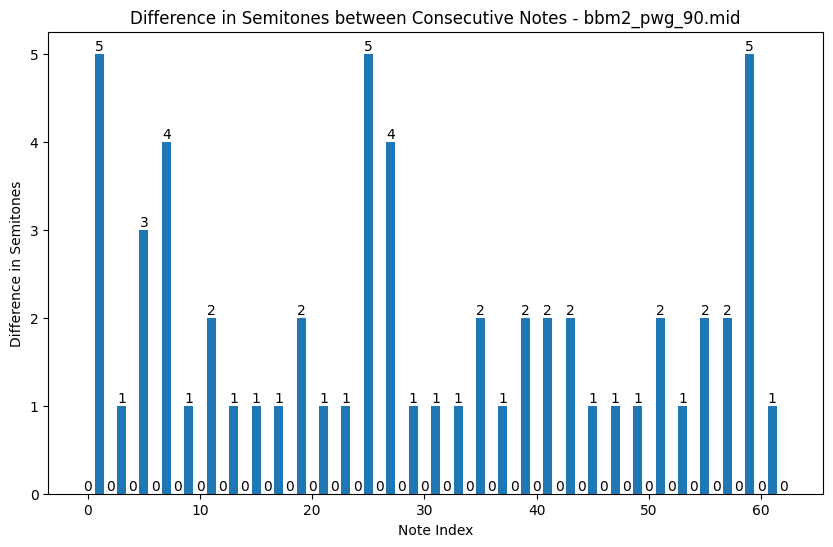

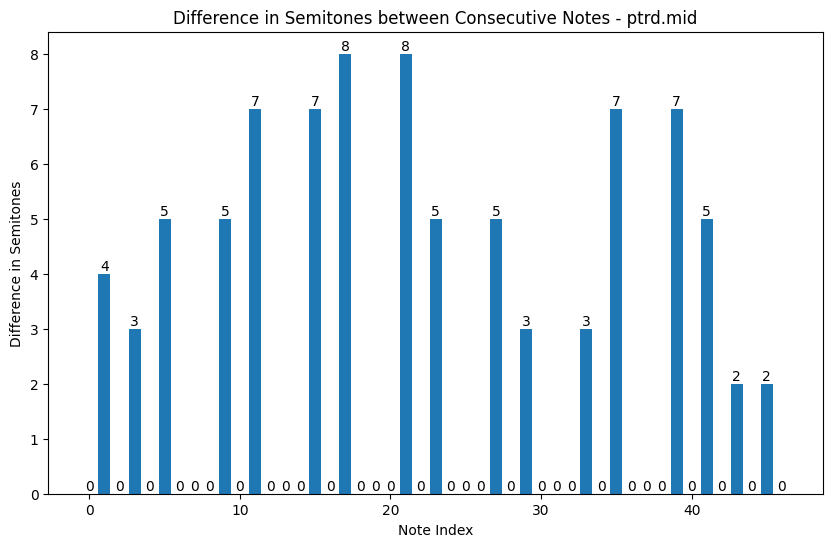

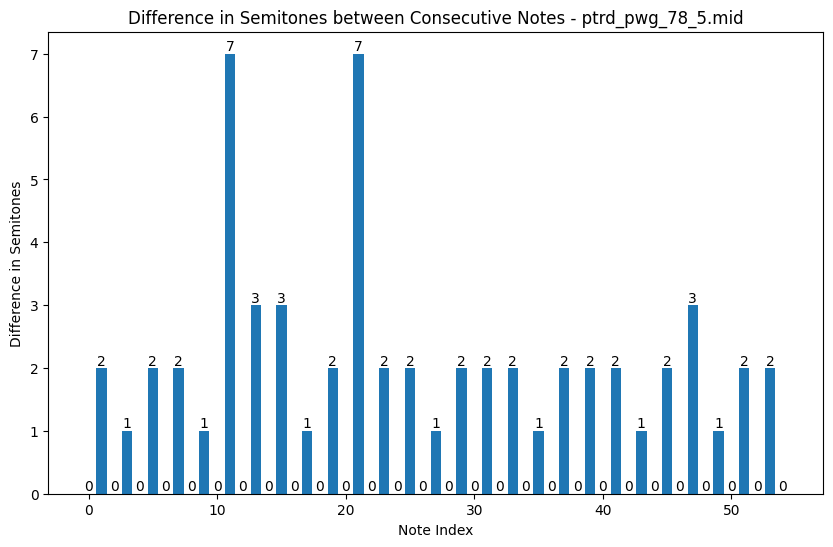

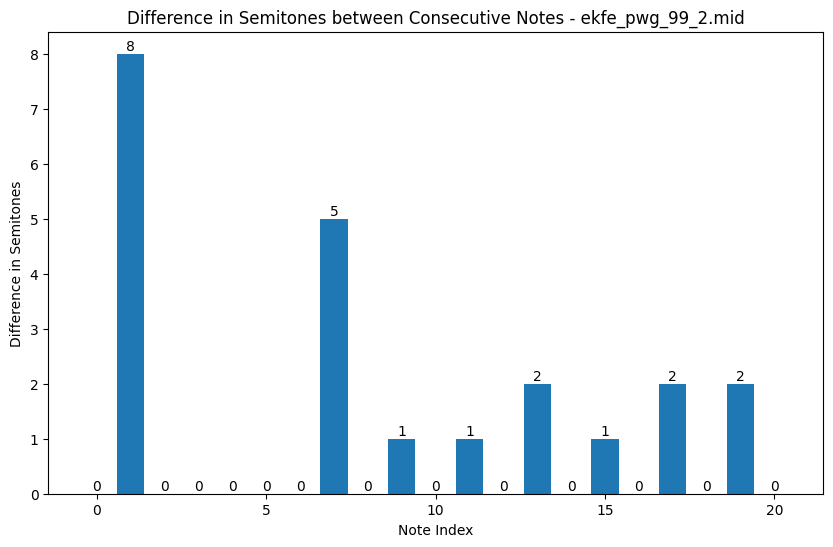

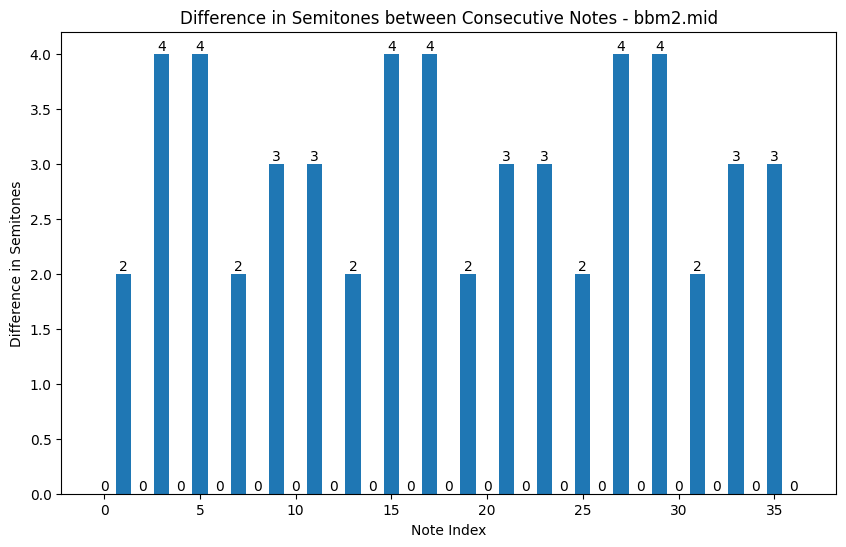

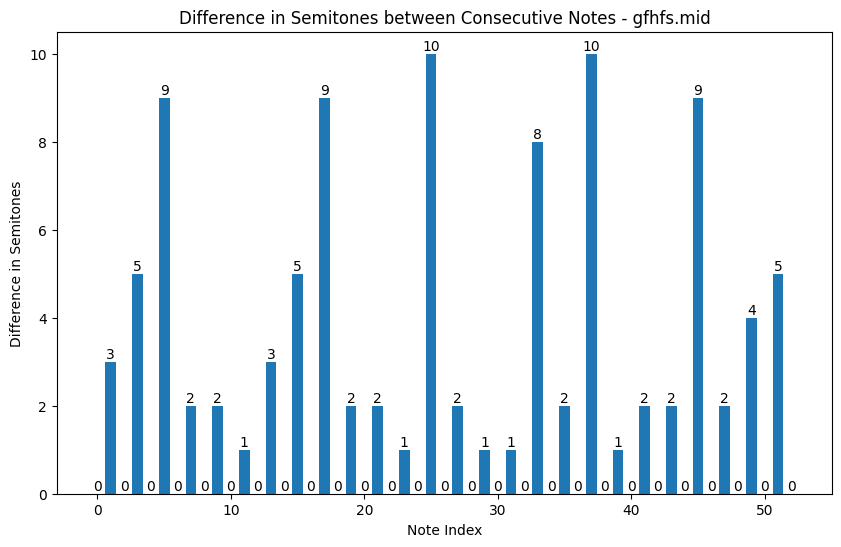

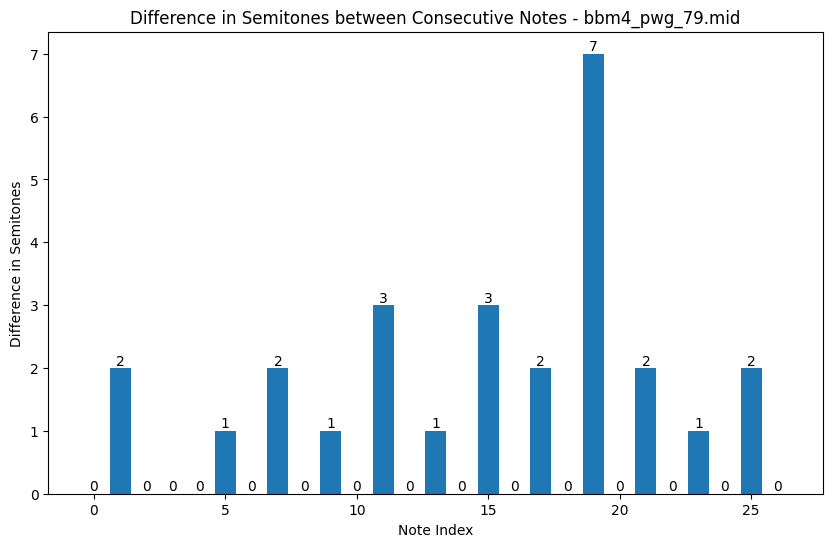

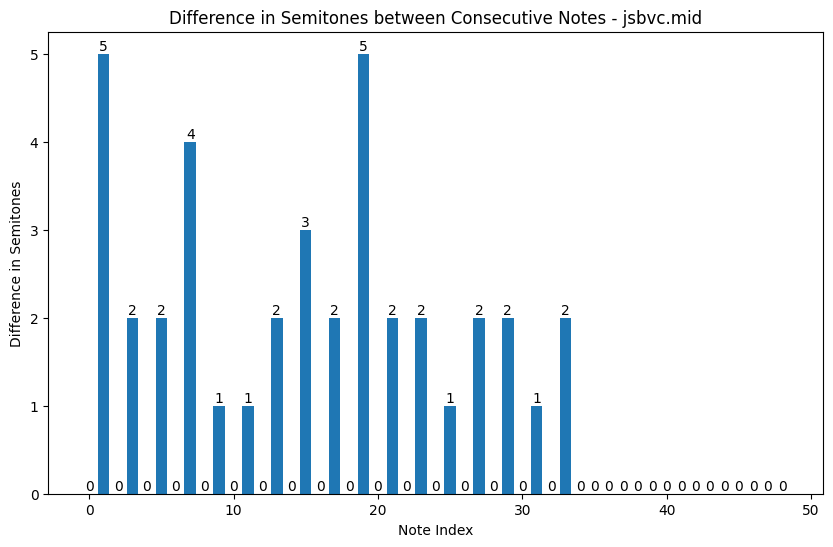

In [ ]:
import os
!pip install mido
import mido
import matplotlib.pyplot as plt

# Folder path
folder_path = 'test/'

# Process each MIDI file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.mid'):
        # Initialize variables to store note information
        notes = []
        semitone_diffs = []

        # Load the .mid file
        mid = mido.MidiFile(os.path.join(folder_path, filename))

        # Extract note information
        for msg in mid:
            if msg.type == 'note_on':
                notes.append({'start_time': msg.time, 'pitch': msg.note})
            elif msg.type == 'note_off':
                for note in notes:
                    if note['pitch'] == msg.note:
                        note['end_time'] = msg.time
                        break

        # Calculate the difference in semitones between consecutive notes
        for i in range(len(notes) - 1):
            pitch1 = notes[i]['pitch']
            pitch2 = notes[i + 1]['pitch']
            semitone_diff = abs(pitch1 - pitch2)
            semitone_diffs.append(semitone_diff)

        # Create a sheet paper image with note differences for the current song
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(semitone_diffs)), semitone_diffs)
        plt.xlabel('Note Index')
        plt.ylabel('Difference in Semitones')
        plt.title(f'Difference in Semitones between Consecutive Notes - {filename}')

         # Add semitone labels to each bar
        for i, semitone_diff in enumerate(semitone_diffs):
            plt.text(i, semitone_diff, str(semitone_diff), ha='center', va='bottom')

        plt.show()
